In [ ]:
import os
import pathlib
from PIL import Image
import shutil
import matplotlib.pyplot as plt

In [ ]:
#Go to kaggle and download the kaggle.json file 
#it contain your authentication keys
#using which you can download any dataset from there
#load the kaggle.json file in your current directory and enter the full path as shown below

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
!kaggle datasets download -d atowarhussain/animal-image-data

 82% 33.0M/40.5M [00:00<00:00, 69.6MB/s]
100% 40.5M/40.5M [00:00<00:00, 102MB/s] 


In [ ]:
#Enter the zip file location here to unzip
!unzip /content/animal-image-data.zip

Archive:  /content/animal-image-data.zip
replace Animal/Cat/cat-1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
src = '/content/Animal/'

In [ ]:
os.listdir(src)

['Cat', 'Horse', 'Koala', 'Dog', 'Pandas']

In [ ]:
for c in os.listdir(src) :
    p = os.path.join(src,c)
    print(f'{c},{len(os.listdir(p))}')

Cat,50
Horse,50
Koala,52
Dog,70
Pandas,50


In [ ]:
def to_png(p,name,c,dst) :
    '''Convert all images to png format

    inputs :
    p -> path to the image 
    name -> rename the image file 
    c -> image count
    dst -> destination to store the file

    returns : None

    '''
    
    fname,extension = os.path.splitext(p)
    
    new_name = name.upper() + '-' + str(c) + '.png'
    new_path = os.path.join(dst,new_name)
    
    if extension != '.png' :
        img = Image.open(p)
        img.save(new_path)
    else :
        shutil.copy(p,new_path)
        
    print(f'{p} to {new_path}')


In [ ]:
data_dir = pathlib.Path(src)

In [ ]:
target='/content/New_Animal/'
if not os.path.exists(target) :
  os.mkdir(target)

In [ ]:
''' convert each image of src folder to pn format and save it a new location'''

for catagory in os.listdir(src) :
    #create sub directory of each catagory under parent 
    sub_dir = os.path.join(target,catagory)
    
    if not os.path.exists(sub_dir) :
        os.mkdir(sub_dir)
        
        
        #iterate over each directory and convert each image to png 
    count = 1
    for p in data_dir.glob(catagory+'/*.*') :
        to_png(str(p),catagory,count,sub_dir)
        count = count + 1 

/content/Animal/Cat/cat-5.jpg to /content/New_Animal/Cat/CAT-1.png
/content/Animal/Cat/cat-34.jpg to /content/New_Animal/Cat/CAT-2.png
/content/Animal/Cat/cat-16.jpg to /content/New_Animal/Cat/CAT-3.png
/content/Animal/Cat/cat-4.jpg to /content/New_Animal/Cat/CAT-4.png
/content/Animal/Cat/cat-23.jpg to /content/New_Animal/Cat/CAT-5.png
/content/Animal/Cat/cat-25.jpg to /content/New_Animal/Cat/CAT-6.png
/content/Animal/Cat/cat-2.jpg to /content/New_Animal/Cat/CAT-7.png
/content/Animal/Cat/cat-29.jpg to /content/New_Animal/Cat/CAT-8.png
/content/Animal/Cat/cat-3.jpg to /content/New_Animal/Cat/CAT-9.png
/content/Animal/Cat/cat-6.jpg to /content/New_Animal/Cat/CAT-10.png
/content/Animal/Cat/cat-41.jpg to /content/New_Animal/Cat/CAT-11.png
/content/Animal/Cat/cat-44.jpg to /content/New_Animal/Cat/CAT-12.png
/content/Animal/Cat/cat-20.jpg to /content/New_Animal/Cat/CAT-13.png
/content/Animal/Cat/cat-21.jpg to /content/New_Animal/Cat/CAT-14.png
/content/Animal/Cat/cat-30.jpg to /content/New_A

In [ ]:
data_dir2 = pathlib.Path(target)

In [ ]:
img_classes = {key : 0 for key in os.listdir(target)}
img_classes

{'Cat': 0, 'Dog': 0, 'Horse': 0, 'Koala': 0, 'Pandas': 0}

In [ ]:
for c in img_classes :
  img_classes[c] = len(list(data_dir2.glob(c+'/*.png')))

In [ ]:
img_classes

{'Cat': 50, 'Dog': 70, 'Horse': 50, 'Koala': 52, 'Pandas': 50}

In [ ]:
'''
key - category name 
value - list of path of images of that category
'''

img_file_dict = {}

for c in img_classes :
  img_file_dict[c] = [str(im) for im in data_dir2.glob(c+'/*.png')]


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
def get_image(p):

  '''read an image using PIL and retur an numpy array of rank 4

  Inputs :
  p -> path to the image

  Returns -> Numpy array pf rank 4
  
  '''
  img = Image.open(p).resize((256,256))
  #plt.imshow(img)
  #plt.axis('off')

  np_img = np.asarray(img,dtype='float32')
  np_img = np.expand_dims(np_img, axis = 0) 

  np_img.shape

  return np_img

In [ ]:
def apply_augmentation(x) :

  '''Apply various image transformation techinque to an image

  Inputs :
     x -> numpy array of rank 4
  
  Returns : Iterator
  '''

  #apply image transformation operation
  datagen = ImageDataGenerator(rotation_range=30,
                               shear_range=0.2,
                               horizontal_flip=True,
                               brightness_range=[0.8,1.5],
                               zoom_range=0.3,
                               fill_mode='nearest')

  #get an iterator
  datagen_iter = datagen.flow(x,batch_size=1)

  return datagen_iter

In [ ]:
def plot(it) :

  '''it -> iterator'''
  # generate samples and plot
  fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))

  # generate batch of images
  for i in range(6):

    #conver the np_array datatype to uint8 from float32
    image = next(it)[0].astype('uint8')

    #plot the image
    ax[i].imshow(image)
    ax[i].axis('off')


In [ ]:
def augment(path) :

  #call the method to load image
  np_img = get_image(path)
  print(f'{np_img.shape}')

  #apply augmentation to loaded image
  x = apply_augmentation(np_img)

  #plot the image
  plot(x)

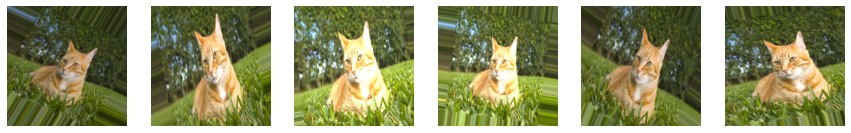

In [ ]:
x = get_image(img_file_dict['Cat'][40])
y = apply_augmentation(x)
plot(y)

In [ ]:
aug_dataset ='/content/Augmented-Dataset/'
if not os.path.exists(aug_dataset) :
  os.mkdir(aug_dataset)

In [ ]:
for key,val in img_file_dict.items() :

  sub_dir = os.path.join(aug_dataset,key)
  if not os.path.exists(sub_dir) :
    os.mkdir(sub_dir)
  num = len(val) + 1

  for p in val : 

    x = get_image(p)
    y = apply_augmentation(x)

    for i in range(4) :

      image = next(y)[0].astype('uint8')
      image = Image.fromarray(image)

      name = key +'-'+ str(num) +'.png'
      new_name = os.path.join(sub_dir,name)

      image.save(new_name)
      num += 1



In [ ]:
data_dir3 = pathlib.Path(aug_dataset)

In [ ]:
'''After augmentation'''

aug_img_dict = {}
for key in img_classes :
  aug_img_dict[key] = len(list((data_dir3.glob(key+'/*.png'))))

print(aug_img_dict)

{'Cat': 200, 'Horse': 200, 'Koala': 208, 'Dog': 280, 'Pandas': 200}


In [ ]:
!zip -r Augmented-Animal-Dataset.zip /content/Augmented-Dataset/ 